In [1]:
import dreye
import numpy as np

In [2]:
wls = np.arange(300, 700, 1.0)

In [3]:
sensitivity = dreye.Sensitivity(
    dreye.create_gaussian_spectrum(
    wls, 
    [350, 455, 560], 
    std=30, units=None, max_normalized=True
))

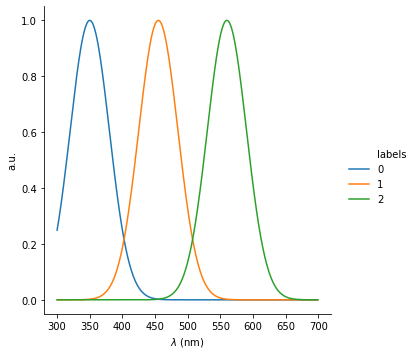

In [4]:
sensitivity.plot()

In [5]:
pr = dreye.LinearPhotoreceptor(
    sensitivity, 
    capture_noise_level=1e-4
)
pr_ = dreye.LinearPhotoreceptor(
    sensitivity, 
)

In [6]:
illuminant = dreye.create_gaussian_spectrum(
    wls, 
    np.arange(400, 600, 20), 
    std=10, units='uE'
)

In [7]:
illuminant.integral

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) <Unit('microspectral_E_Q * nanometer')>

In [8]:
background = dreye.Spectrum(
    np.ones(len(wls))/len(wls), 
    wls, units='uE'
)

In [9]:
illuminant_ = background + illuminant

In [10]:
pr.excitation(
    illuminant_, 
    background=background, return_units=False
)

array([[2.5184, 2.112 , 1.    ],
       [1.4573, 3.735 , 1.0003],
       [1.0923, 5.5093, 1.0038],
       [1.0125, 5.9836, 1.034 ],
       [1.0011, 4.6919, 1.2057],
       [1.0001, 2.8334, 1.8341],
       [1.    , 1.6103, 3.2674],
       [1.    , 1.1362, 5.1315],
       [1.    , 1.0204, 6.0463],
       [1.    , 1.002 , 5.1315]])

In [11]:
pr_.excitation(
    illuminant_, 
    background=background, return_units=False
)

array([[2.51836568, 2.11198699, 1.00001393],
       [1.45732295, 3.73504665, 1.00027982],
       [1.09233191, 5.50932959, 1.00376748],
       [1.01249577, 5.98357993, 1.03400153],
       [1.00113359, 4.69192682, 1.20569726],
       [1.00006893, 2.8333566 , 1.83414351],
       [1.00000281, 1.6102714 , 3.26743713],
       [1.00000008, 1.13616995, 5.13153983],
       [1.        , 1.02036675, 6.04627414],
       [1.        , 1.00204195, 5.13153983]])

In [12]:
pr.excitation(
    np.zeros(len(wls)), 
    background=background, return_units=False
)

array([[0.0001, 0.0001, 0.0001]])

In [13]:
pr_.excitation(
    np.zeros(len(wls)),
    background=background, return_units=False
)

array([[0., 0., 0.]])